## Exoplanet Hunting in Deep Space
The data describe the change in flux (light intensity) of several thousand stars. Each star has a binary label of 2 or 1. 2 indicated that that the star is confirmed to have at least one exoplanet in orbit; some observations are in fact multi-planet systems.

As you can imagine, planets themselves do not emit light, but the stars that they orbit do. If said star is watched over several months or years, there may be a regular 'dimming' of the flux (the light intensity). This is evidence that there may be an orbiting body around the star; such a star could be considered to be a 'candidate' system. Further study of our candidate system, for example by a satellite that captures light at a different wavelength, could solidify the belief that the candidate can in fact be 'confirmed'.

DATASET = https://www.kaggle.com/keplersmachines/kepler-labelled-time-series-data

## Description
- LABEL -> 2 is an exoplanet star and 1 is a non-exoplanet-star.
- FLUX1-FLUX3197 -> the light intensity recorded for each star, at a different point in time.

**Trainset:**

- 5087 rows or observations.
- 3198 columns or features.
- Column 1 is the label vector. Columns 2 - 3198 are the flux values over time.
- 37 confirmed exoplanet-stars and 5050 non-exoplanet-stars.

**Testset:**

- 570 rows or observations.
- 3198 columns or features.
- Column 1 is the label vector. Columns 2 - 3198 are the flux values over time.
- 5 confirmed exoplanet-stars and 565 non-exoplanet-stars.

## Algorithm (3-layered NN):
**Steps:**
- Get the train and test data.
- Normalize the data.
- Define the neural network structure i.e. get the no. of nodes of each layer.
- Randomly initialize the weights and parameters of all the layers (0.01).
- Forward propagation.
- Compute cost function.
- Backward propagation.
- Update the weights and baises (Gradient descent).
- Model() for combining forward_prop,compute_grap,backward_prop,update_weh.
- Predict the values for train and test set using updated weights.
- Calculate the accuracy on Train and test set.

### Libraries required

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing exoTrain.csv & exoTest.csv file (train dataset):

In [111]:
#training set
data_train = pd.read_csv('./exoTrain.csv')

In [112]:
#test set
data_test = pd.read_csv('./exoTest.csv')

In [113]:
Y_train = np.reshape(np.array(data_train['LABEL']),(1,data_train.shape[0]))
X_train = np.transpose(np.array(data_train[data_train.columns[1:]]))

In [114]:
Y_test = np.reshape(np.array(data_test['LABEL']),(1,data_test.shape[0]))
X_test = np.transpose(np.array(data_test[data_test.columns[1:]]))

In [115]:
#shapes of all X and Y for train and test set:
print("Shapes:")
print("Y_train = ",Y_train.shape)
print("X_train = ",X_train.shape)
print("Y_test = ",Y_test.shape)
print("X_test = ",X_test.shape)

Shapes:
Y_train =  (1, 5087)
X_train =  (3197, 5087)
Y_test =  (1, 570)
X_test =  (3197, 570)


### Normalizing Data:

In [116]:
# Normalization of both train and test set X:
#training set:
mean_train = np.reshape(np.mean(X_train,axis=0),(1,X_train.shape[1]))
std_train = np.reshape(np.std(X_train,axis=0),(1,X_train.shape[1]))
X_train = (X_train - mean_train)/std_train
#test set:
mean_test = np.reshape(np.mean(X_test,axis=0),(1,X_test.shape[1]))
std_test = np.reshape(np.std(X_test,axis=0),(1,X_test.shape[1]))
X_test = (X_test - mean_test)/std_test


### Sigmoid function:
This function is used in output layer which acts as an activation function.

In [117]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

### Defining Neural network structure:
This would consist of 3 layers (excluding input layer) i.e 2-hidden layer and 1-output layer. Each ***hidden layer***=**12 nodes** and ***output layer*** = **1 node**. Hidden layers will use **tanh()** as activation function and output layer will use **sigmoid()**

In [118]:
def defining_structure(X):
    n_i = X.shape[0]
    n_h1 = 12
    n_h2 = 12
    n_o = 1
    
    nodes ={
        "n_i":n_i,
        "n_h1":n_h1,
        "n_h2":n_h2,
        "n_o":n_o
    }
    
    return nodes

In [119]:
nodes = defining_structure(X_train)
print(nodes["n_h1"],nodes["n_h2"])

12 12


### Random initialization of each layer

In [120]:
def random_initialization(X):
    np.random.seed(2)
    
    nodes = defining_structure(X)
    
    W1 = np.random.randn(nodes["n_h1"],nodes["n_i"])
    b1 = np.zeros((nodes["n_h1"],1))
    W2 = np.random.randn(nodes["n_h2"],nodes["n_h1"])
    b2 = np.zeros((nodes["n_h2"],1))
    W3 = np.random.randn(nodes["n_o"],nodes["n_h2"])
    b3 = np.zeros((nodes["n_o"],1))
    
#     print(W1.shape)
#     print(b1.shape)
#     print(W2.shape)
#     print(b2.shape)
#     print(W3.shape)
#     print(b3.shape)

    params = {
        "W1":W1,
        "b1":b1,
        "W2":W2,
        "b2":b2,
        "W3":W3,
        "b3":b3
    }
    
    return params

In [121]:
random_initialization(X_train)

{'W1': array([[-0.41675785, -0.05626683, -2.1361961 , ...,  1.61430797,
          0.99890746, -0.88203649],
        [-0.57428347, -1.55477478,  1.14098302, ..., -0.1082349 ,
          1.01994095,  0.1331631 ],
        [ 1.90829452, -1.35836971,  0.06887664, ...,  2.43568076,
         -0.50906617, -2.59542559],
        ..., 
        [-1.26556713,  0.56972065,  0.81175451, ..., -1.26632935,
         -1.21179189, -1.38104343],
        [ 0.50079915,  1.67793197,  0.38873169, ...,  0.7008209 ,
          0.13992836,  0.80095466],
        [-0.94882391,  0.48822788, -1.02400764, ...,  1.99515716,
         -0.14299326, -0.75133526]]),
 'W2': array([[  1.53553181e+00,   4.56998839e-01,   3.77484828e-01,
          -9.45032861e-01,   6.48676419e-01,   5.98076928e-01,
          -2.11310427e+00,   1.27573134e+00,   2.28080883e-01,
           7.44821980e-01,   2.69226218e-01,  -6.86534569e-01],
        [  1.42564291e-01,   5.41961813e-01,   5.29203235e-01,
           1.32735074e+00,  -2.23521689e+00,

### Forward propagation:

In [122]:
#forward propagation:
def forward_prop(X,Y,parameters):
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    Z1 = np.dot(W1,X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = np.tanh(Z2)
    Z3 = np.dot(W3,A2) + b3
    A3 = sigmoid(Z3)
    
    cache = {
        "Z1":Z1,
        "A1":A1,
        "Z2":Z2,
        "A2":A2,
        "Z3":Z3,
        "A3":A3
    }
    
    return A3,cache
    

In [123]:
forward_prop(X_train,Y_train,random_initialization(X_train))

(array([[ 0.98817604,  0.32539714,  0.40403171, ...,  0.609769  ,
          0.00609144,  0.15273877]]),
 {'A1': array([[ 1.        , -1.        ,  1.        , ..., -1.        ,
          -1.        ,  1.        ],
         [-1.        ,  0.99989749,  1.        , ...,  1.        ,
           1.        ,  1.        ],
         [-1.        ,  1.        ,  1.        , ...,  1.        ,
          -1.        ,  0.99998934],
         ..., 
         [ 1.        , -0.99999959,  1.        , ...,  1.        ,
          -1.        , -1.        ],
         [-1.        , -1.        ,  0.99999816, ...,  1.        ,
           1.        ,  1.        ],
         [-1.        , -1.        , -1.        , ...,  1.        ,
          -1.        ,  0.99997032]]),
  'A2': array([[-0.76785051, -0.8652193 ,  0.85358783, ..., -0.9997154 ,
          -0.99999813,  0.08171078],
         [ 0.27489117,  0.94681416,  0.89144828, ...,  0.25049978,
           0.98527126,  0.99999137],
         [-0.99777628, -0.96099613,

### Computing cost

In [124]:
def compute_cost(A3,Y):
    m = Y.shape[1]
    cost = -(np.dot(Y,np.transpose(np.log(A3))) + np.dot((1-Y),np.transpose(np.log(1-A3))))/m
    cost = np.squeeze(cost)
    return cost

### Backpropagation:

In [125]:
#recalculate backprop derivaties.
def backward_prop(X,Y,parameters,cache):
    m = Y.shape[1]
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    Z1 = cache["Z1"]
    A1 = cache["A1"]
    Z2 = cache["Z2"]
    A2 = cache["A2"]
    Z3 = cache["Z3"]
    A3 = cache["A3"]
    
    dA3 = (-Y/A3) + (1-Y)/(1-A3)
    dZ3 = A3 - Y
    dW3 = np.dot(dZ3,np.transpose(A2))/m
    db3 = np.sum(dZ3,axis=1,keepdims=True)/m
    
    dA2 = np.dot(np.transpose(W3),dZ3)      #dA2 = (12,5087)
    dZ2 = dA2*(1-np.power(np.tanh(Z2),2))
    dW2 = np.dot(dZ2,np.transpose(A1))/m
    db2 = np.sum(dZ2,keepdims=True)/m
    
    dA1 = np.dot(W2,Z2)
    dZ1 = dA1*(1-np.power(np.tanh(Z1),2))
#     dw1 = dz1.X
#     (12,3197) = (12,5087).(3197,5087)
#     dw1 = dz1.np.transpose(X)
#     (12,3197) = (12,5087).(5087,3197)
    dW1 = np.dot(dZ1,np.transpose(X))/m
    db1 = np.sum(dZ1,keepdims=True)/m
    
    grads = {
        "dW3":dW3,
        "dW2":dW2,
        "dW1":dW1,
        "db3":db3,
        "db2":db2,
        "db1":db1
    }
    
    return grads

### Updating the weights and parameters:

In [126]:
def update_weh(learning_rate,parameters,grads):
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    dW3 = grads["dW3"]
    dW2 = grads["dW2"]
    dW1 = grads["dW1"]
    db3 = grads["db3"]
    db2 = grads["db2"]
    db1 = grads["db1"]
    
    W3 = W3 - learning_rate*dW3
    W2 = W2 - learning_rate*dW2
    W1 = W1 - learning_rate*dW1
    b3 = b3 - learning_rate*db3
    b2 = b2 - learning_rate*db2
    b1 = b1 - learning_rate*db1
    
    params = {
        "W1":W1,
        "b1":b1,
        "W2":W2,
        "b2":b2,
        "W3":W3,
        "b3":b3
    }
    
    return params

### Model function

In [127]:
def model(X,Y,learning_rate=0.03,num_iteration=2000):
    
    parameters = random_initialization(X)
    all_cost = list()
    
    for i in range(num_iteration):
        A3,cache = forward_prop(X,Y,parameters)
        cost = compute_cost(A3,Y)
        all_cost.append(cost)
        print("Cost for iteration ",i," = ",cost,end='\r')
        
        grads = backward_prop(X,Y,parameters,cache)
        parameters = update_weh(learning_rate,parameters,grads)
        
    nn_model={
        "grads":grads,
        "cache":cache,
        "parameters":parameters,
        "cost":all_cost
    }
    return nn_model
    

In [128]:
nn_model_train = model(X_train,Y_train)

In [129]:
nn_model_test = model(X_test,Y_test)

In [130]:
train_prediction = np.squeeze(nn_model_train["cache"]["A3"])
test_prediction = np.squeeze(nn_model_test["cache"]["A3"])

In [131]:
print("Training set accuracy = ",(100 - np.mean(np.abs(train_prediction - Y_train))*100))
print("Test set accuracy = ",(100 - np.mean(np.abs(test_prediction - Y_test))*100))

Training set accuracy =  99.1698625276
Test set accuracy =  98.9712555196


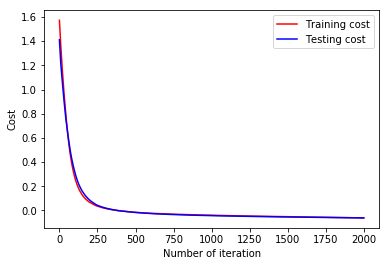

In [132]:
cost_train = np.squeeze(nn_model_train["cost"])
cost_test = np.squeeze(nn_model_test["cost"])

train, = plt.plot(cost_train,label='Training cost',color='red')
test, = plt.plot(cost_test,label='Testing cost',color='blue')

plt.legend(handles=[train,test])
plt.xlabel('Number of iteration')
plt.ylabel('Cost')
plt.show()